In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import MobileNetV2
from keras.preprocessing import image
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
training_data = train_datagen.flow_from_directory(
        'Data\Train',
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')
testing_data = train_datagen.flow_from_directory(
        'Data\Test',
        target_size=(244, 244),
        batch_size=32,
        class_mode='categorical')

Found 1458 images belonging to 3 classes.
Found 141 images belonging to 3 classes.


In [ ]:
#adding early_stopping so my computer doens't waste time
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
model = Sequential([Flatten(),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dropout(rate=0.5),
                    Dense(3, activation = 'softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs = 30,
                    verbose = 1,
                    callbacks= [early_stopping])

Epoch 1/30
46/46 [==============================] - 14s 289ms/step - loss: 31.1446 - accuracy: 0.4671 - val_loss: 1.2253 - val_accuracy: 0.6809
Epoch 2/30
46/46 [==============================] - 13s 285ms/step - loss: 1.2097 - accuracy: 0.6241 - val_loss: 0.6365 - val_accuracy: 0.7447
Epoch 3/30
46/46 [==============================] - 13s 285ms/step - loss: 0.7847 - accuracy: 0.6296 - val_loss: 0.6400 - val_accuracy: 0.7660
Epoch 4/30
46/46 [==============================] - 13s 284ms/step - loss: 0.7788 - accuracy: 0.6344 - val_loss: 0.6330 - val_accuracy: 0.7092
Epoch 5/30
46/46 [==============================] - 13s 285ms/step - loss: 0.7688 - accuracy: 0.6413 - val_loss: 0.6180 - val_accuracy: 0.7447
Epoch 6/30
46/46 [==============================] - 13s 288ms/step - loss: 0.7520 - accuracy: 0.6324 - val_loss: 0.6413 - val_accuracy: 0.7376
Epoch 7/30
46/46 [==============================] - 13s 289ms/step - loss: 0.7627 - accuracy: 0.6598 - val_loss: 0.6305 - val_accuracy: 0.737

In [11]:
# great start lets add more layers

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 512)               91447808  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 91,579,907
Trainable params: 91,579,907
Non-trainable params: 0
_________________________________________________________________


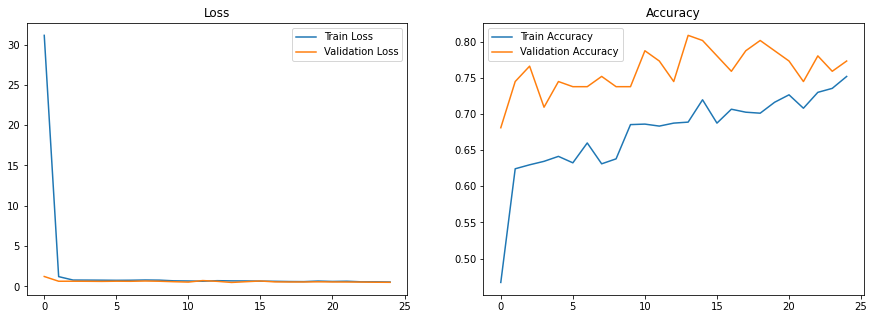

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [13]:
score = model.evaluate(testing_data)

5/5 [==============================] - 0s 65ms/step - loss: 0.5030 - accuracy: 0.7730


In [14]:
# great first model, lets see if diffirent layers do better

In [15]:
model = Sequential([Conv2D(200, (3,3), activation='relu', input_shape=(244, 244, 3)),
                    MaxPool2D(5,5),
                    Conv2D(180, (3,3), activation='relu'),
                    MaxPool2D(5,5),
                    Flatten(),
                    Dense(180, activation='relu'),
                    Dropout(rate=0.5),
                    Dense(3, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs=30,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/30
46/46 [==============================] - 75s 2s/step - loss: 0.8429 - accuracy: 0.6070 - val_loss: 0.4071 - val_accuracy: 0.8865
Epoch 2/30
18/46 [==========>...................] - ETA: 45s - loss: 0.5304 - accuracy: 0.8003

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [ ]:
score = model.evaluate(testing_data)

In [ ]:
# cool, lets add image augmentation in and some more layers
# added a seed this time for consistency
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=90,
    shear_range=0.2,  
    zoom_range=0.2,        
    horizontal_flip=True,
    vertical_flip=True)

training_data = train_datagen.flow_from_directory(
        'Data\Train',
        target_size=(244, 244),
        batch_size=32,
        seed=42,
        class_mode='categorical')
testing_data = train_datagen.flow_from_directory(
        'Data\Test',
        target_size=(244, 244),
        batch_size=32,
        seed=42,
        class_mode='categorical')

In [ ]:
model = Sequential([Conv2D(200, (3,3), activation='LeakyReLU', input_shape=(244, 244, 3)),
                    MaxPool2D(2,2),
                    BatchNormalization(),
                    Conv2D(180, (3,3), activation='LeakyReLU'),
                    MaxPool2D(5,5),
                    Conv2D(128, (2,2), activation='LeakyReLU'),
                    MaxPool2D(3,3),
                    Dropout(rate=0.35),
                    Conv2D(64, (2,3), activation='LeakyReLU'),
                    MaxPool2D(3,3),
                    Flatten(),
                    Dense(250, activation='LeakyReLU'),
                    Dropout(rate=0.5),
                    Dense(180, activation='LeakyReLU'),
                    Dropout(rate=0.35),
                    Dense(128, activation='LeakyReLU'),
                    Dropout(rate=0.2),
                    Dense(3, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
trained_model = model.fit(training_data,
                    validation_data=testing_data,
                    epochs=60,
                    verbose=1,
                    callbacks=[early_stopping])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(trained_model.epoch, trained_model.history["loss"], label="Train Loss")
ax[0].plot(trained_model.epoch, trained_model.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(trained_model.epoch, trained_model.history["accuracy"], label="Train Accuracy")
ax[1].plot(trained_model.epoch, trained_model.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()

In [ ]:
score = model.evaluate(testing_data)